Singular values from numpy SVD:
[0.09541776 0.05810584 0.05223438 0.04649421 0.03870592 0.03692713
 0.03484178 0.03132381 0.01331145 0.00440093]

[[-1.  1.  1.  1.  1. -1.  1.  1. -1. -1.]
 [-1.  1.  1.  1.  1. -1.  1.  1. -1. -1.]
 [-1.  1.  1.  1.  1. -1.  1.  1. -1. -1.]
 [-1.  1.  1.  1.  1. -1.  1.  1. -1. -1.]
 [-1.  1.  1.  1.  1. -1.  1.  1. -1. -1.]
 [-1.  1.  1.  1.  1. -1.  1.  1. -1. -1.]
 [-1.  1.  1.  1.  1. -1.  1.  1. -1. -1.]
 [-1.  1.  1.  1.  1. -1.  1.  1. -1. -1.]
 [-1.  1.  1.  1.  1. -1.  1.  1. -1. -1.]
 [-1.  1.  1.  1.  1. -1.  1.  1. -1. -1.]]


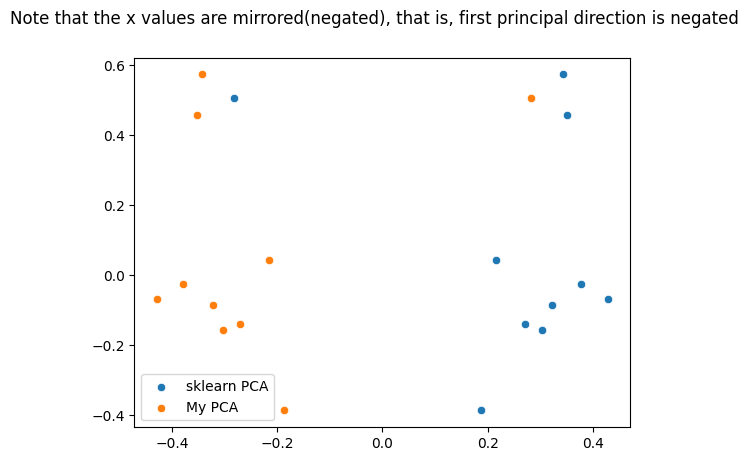

In [18]:
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

dataset = datasets.load_diabetes().data

X = dataset * (np.sqrt(1/(dataset.shape[0])))
U, S, Vh = np.linalg.svd(X)
V = Vh.T # principal (column) vectors matrix: calculation using numpy
print("Singular values from numpy SVD:", S, sep="\n")
print()

pca = PCA()
pca.fit(dataset).transform(dataset)
V_scikit = pca.components_.T
print(V/V_scikit)
# print("Numpy calculated principal directions:", V[:,:6], sep="\n")
# print()
# print("Sklearn's calculated principal directions:", V_scikit, sep="\n")

plt.figure()
sns.scatterplot(x=V_scikit[:,0], y=V_scikit[:,1], label="sklearn PCA")
sns.scatterplot(x=V[:,0], y=V[:,1], label="My PCA")
plt.suptitle("Note that the x values are mirrored(negated), that is, first principal direction is negated")
plt.show()

Custom PCA result shape: (100, 2)
Scikit-learn PCA result shape: (100, 2)


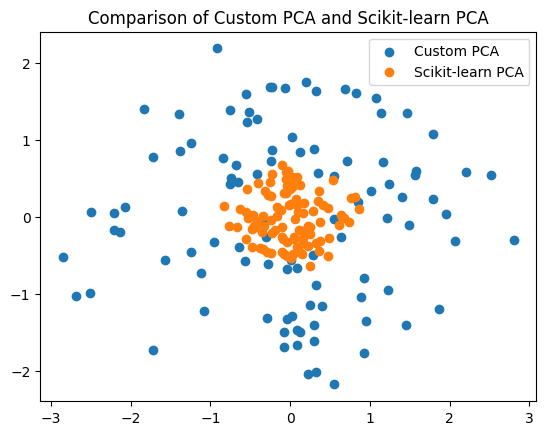

In [14]:
def my_pca(X, num_components):
    # Standardize the data
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_standardized = (X - X_mean) / X_std

    # Compute the covariance matrix
    cov_matrix = np.cov(X_standardized, rowvar=False)

    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top 'num_components' eigenvectors
    principal_components = eigenvectors[:, :num_components]

    # Project the data onto the principal components
    pca_result = np.dot(X_standardized, principal_components)

    return pca_result

# Example usage:
# Generate random data for testing
np.random.seed(42)
data = np.random.rand(100, 5)  # 100 samples, 5 features

# Specify the number of principal components
num_components = 2

# Perform PCA using custom implementation
result_custom = my_pca(data, num_components)

# Perform PCA using scikit-learn
pca_sklearn = PCA(n_components=num_components)
result_sklearn = pca_sklearn.fit_transform(data)

# Compare results
print("Custom PCA result shape:", result_custom.shape)
print("Scikit-learn PCA result shape:", result_sklearn.shape)

# Plot the results for visual comparison
plt.scatter(result_custom[:, 0], result_custom[:, 1], label='Custom PCA')
plt.scatter(result_sklearn[:, 0], result_sklearn[:, 1], label='Scikit-learn PCA')
plt.title('Comparison of Custom PCA and Scikit-learn PCA')
plt.legend()
plt.show()